In [0]:
 import pandas as pd
 LoanData=pd.read_csv("/content/Exercise1.csv")
 LoanPrep=LoanData.copy()

In [3]:
LoanPrep.isnull().sum()

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64

**Drop the rows with missing values**

In [4]:
LoanPrep=LoanPrep.dropna()
LoanPrep

,gender,married,ch,income,loanamt,status
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y
5,Male,Yes,1.0,5417,267.0,Y
...,...,...,...,...,...,...
609,Female,No,1.0,2900,71.0,Y
610,Male,Yes,1.0,4106,40.0,Y
611,Male,Yes,1.0,8072,253.0,Y
612,Male,Yes,1.0,7583,187.0,Y


In [5]:
LoanPrep.isnull().sum()

gender     0
married    0
ch         0
income     0
loanamt    0
status     0
dtype: int64

In [0]:
LoanPrep=LoanPrep.drop(['gender'],axis=1)

**Create the dummy variable for categorical variables**

In [7]:
LoanPrep.dtypes

married     object
ch         float64
income       int64
loanamt    float64
status      object
dtype: object

In [8]:
LoanPrep=pd.get_dummies(LoanPrep,drop_first=True)
LoanPrep

,ch,income,loanamt,married_Yes,status_Y
1,1.0,4583,128.0,1,0
2,1.0,3000,66.0,1,1
3,1.0,2583,120.0,1,1
4,1.0,6000,141.0,0,1
5,1.0,5417,267.0,1,1
...,...,...,...,...,...
609,1.0,2900,71.0,0,1
610,1.0,4106,40.0,1,1
611,1.0,8072,253.0,1,1
612,1.0,7583,187.0,1,1


**Normalize the data**

In [0]:
from sklearn.preprocessing import StandardScaler
scaler_=StandardScaler()

In [10]:
LoanPrep['income']=scaler_.fit_transform(LoanPrep[['income']])
LoanPrep['income']

1     -0.128073
2     -0.392077
3     -0.461621
4      0.108246
5      0.011017
         ...   
609   -0.408754
610   -0.207624
611    0.453802
612    0.372249
613   -0.128073
Name: income, Length: 529, dtype: float64

In [11]:
LoanPrep['loanamt']=scaler_.fit_transform(LoanPrep[['loanamt']])
LoanPrep['loanamt']

1     -0.194250
2     -0.971015
3     -0.294478
4     -0.031380
5      1.547205
         ...   
609   -0.908372
610   -1.296754
611    1.371807
612    0.544929
613   -0.131608
Name: loanamt, Length: 529, dtype: float64

In [12]:
LoanPrep

,ch,income,loanamt,married_Yes,status_Y
1,1.0,-0.128073,-0.194250,1,0
2,1.0,-0.392077,-0.971015,1,1
3,1.0,-0.461621,-0.294478,1,1
4,1.0,0.108246,-0.031380,0,1
5,1.0,0.011017,1.547205,1,1
...,...,...,...,...,...
609,1.0,-0.408754,-0.908372,0,1
610,1.0,-0.207624,-1.296754,1,1
611,1.0,0.453802,1.371807,1,1
612,1.0,0.372249,0.544929,1,1


**Create the x and y**

In [0]:
Y=LoanPrep[['status_Y']]
X=LoanPrep.drop(['status_Y'],axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1234,stratify=Y) 

In [15]:
X_train

,ch,income,loanamt,married_Yes
17,0.0,-0.307022,-0.845730,0
474,1.0,0.030196,0.231717,0
512,1.0,-0.344880,0.056319,1
459,1.0,0.497497,0.206660,1
405,1.0,-0.134077,-0.357120,0
...,...,...,...,...
289,1.0,0.693290,0.544929,0
386,1.0,-0.501147,-0.144136,0
118,1.0,0.036199,0.394587,1
225,1.0,-0.350383,0.331945,1


In [16]:
Y_test

,status_Y
373,0
464,0
3,1
262,0
401,0
...,...
360,0
71,1
96,1
388,1


In [0]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
Y_predict=lr.predict(X_test)
Y_predict

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1], dtype=uint8)

**Build the confusion matrix and get the accuracy**

In [20]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(Y_test,Y_predict)
cm

array([[ 29,  20],
       [  2, 108]])

In [21]:
lr.score(X_test,Y_test)

0.8616352201257862

In [22]:
cr=classification_report(Y_test,Y_predict)
cr

'              precision    recall  f1-score   support\n\n           0       0.94      0.59      0.72        49\n           1       0.84      0.98      0.91       110\n\n    accuracy                           0.86       159\n   macro avg       0.89      0.79      0.82       159\nweighted avg       0.87      0.86      0.85       159\n'

**Another method to find accuracy score**

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(Y_test,Y_predict)
accuracy_score

0.8616352201257862

**Adjust the probabilities**

In [31]:
Y_prob=lr.predict_proba(X_test)
Y_prob

array([[0.86794846, 0.13205154],
       [0.86443493, 0.13556507],
       [0.19414475, 0.80585525],
       [0.27107396, 0.72892604],
       [0.23631018, 0.76368982],
       [0.82637721, 0.17362279],
       [0.18825241, 0.81174759],
       [0.21904539, 0.78095461],
       [0.86651913, 0.13348087],
       [0.24450014, 0.75549986],
       [0.19014166, 0.80985834],
       [0.91793183, 0.08206817],
       [0.19108887, 0.80891113],
       [0.83636997, 0.16363003],
       [0.8315327 , 0.1684673 ],
       [0.1860378 , 0.8139622 ],
       [0.2118333 , 0.7881667 ],
       [0.26285465, 0.73714535],
       [0.17715066, 0.82284934],
       [0.86055471, 0.13944529],
       [0.24147129, 0.75852871],
       [0.26301839, 0.73698161],
       [0.19001616, 0.80998384],
       [0.26038771, 0.73961229],
       [0.26337013, 0.73662987],
       [0.25646274, 0.74353726],
       [0.23048316, 0.76951684],
       [0.2812819 , 0.7187181 ],
       [0.19627785, 0.80372215],
       [0.22128793, 0.77871207],
       [0.

In [32]:
Y_prob=lr.predict_proba(X_test)[:,1]
Y_prob

array([0.13205154, 0.13556507, 0.80585525, 0.72892604, 0.76368982,
       0.17362279, 0.81174759, 0.78095461, 0.13348087, 0.75549986,
       0.80985834, 0.08206817, 0.80891113, 0.16363003, 0.1684673 ,
       0.8139622 , 0.7881667 , 0.73714535, 0.82284934, 0.13944529,
       0.75852871, 0.73698161, 0.80998384, 0.73961229, 0.73662987,
       0.74353726, 0.76951684, 0.7187181 , 0.80372215, 0.77871207,
       0.11740852, 0.15979222, 0.81370741, 0.81304801, 0.78170526,
       0.14353229, 0.83034976, 0.82288197, 0.1766822 , 0.82705651,
       0.74526906, 0.744386  , 0.80515961, 0.82309065, 0.12545255,
       0.09072906, 0.82153169, 0.74673919, 0.80562251, 0.83287524,
       0.18188939, 0.81385427, 0.16591426, 0.78645433, 0.78731789,
       0.18250139, 0.7091541 , 0.77210097, 0.79822718, 0.78404996,
       0.74833446, 0.80229149, 0.74632792, 0.79058868, 0.7860087 ,
       0.78837469, 0.83648173, 0.75872331, 0.7669137 , 0.77702998,
       0.76390015, 0.69152131, 0.76568453, 0.80229078, 0.72744

**Classification based on the probability values**

In [33]:
Y_new_pred=[]
threshold=0.8
for i in range(0,len(Y_prob)):
  if Y_prob[i] > threshold:
    Y_new_pred.append(1)
  else:
     Y_new_pred.append(0)
Y_new_pred


[0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0]

get the metrics

In [34]:
cm2=confusion_matrix(Y_test,Y_new_pred)
score2=lr.score(X_test,Y_test)
cm2=classification_report(Y_test,Y_new_pred)
score2=lr.score(X_test,Y_new_pred)
cr2=classification_report(Y_test,Y_new_pred)
cr2

'              precision    recall  f1-score   support\n\n           0       0.43      0.94      0.59        49\n           1       0.94      0.45      0.61       110\n\n    accuracy                           0.60       159\n   macro avg       0.69      0.70      0.60       159\nweighted avg       0.79      0.60      0.61       159\n'

**Understand and implement roc auc curve**

In [0]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold = roc_curve(Y_test,Y_prob)
auc=roc_auc_score(Y_test,Y_prob)

**plot the roc curve**

Text(0.5, 1.0, 'Roc curve for loan prediction')

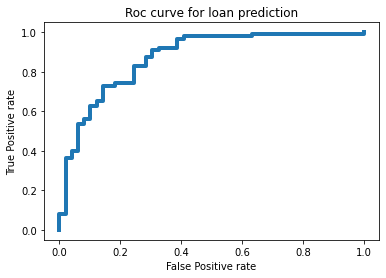

In [36]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,linewidth=4)
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("Roc curve for loan prediction")